# ENGR-E583: Visual Analysis of Meta-Kaggle Data to Uncover Trends in the Data Science Landscape
## Meta-Kaggle Project Team 2: Python Notebook for Project Visualizations
### Yeon-Soo Chung, Kabir Chaturvedi, Bhoomika Pathapati, Monisha Patro, Ishika Thakur

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize 
import matplotlib.ticker as ticker
from scipy.stats import gaussian_kde
from collections import Counter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython.display import display

### Counting the frequencies of certain data science terms in forum posts

In [2]:
ForumMessages = pd.read_csv('meta_kaggle_data/ForumMessages.csv')
ForumMessages = ForumMessages[['PostUserId', 'PostDate', 'Message']]
ForumMessages['PostDate'] = pd.to_datetime(ForumMessages['PostDate'])
ForumMessages['PostDate'] = ForumMessages['PostDate'].dt.year
ForumMessages = ForumMessages.rename(columns={'PostDate': 'Year'})
ForumMessages = ForumMessages[ForumMessages['Year'] <= 2023] # exclude 2024 data
ForumMessages['Message'] = ForumMessages['Message'].str.lower() # make message all lower-case
ForumMessages = ForumMessages.dropna(subset=['Message']) # drop nan messages

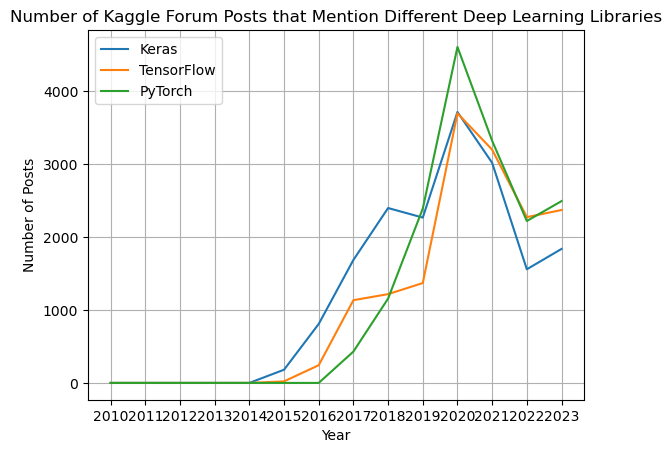

In [3]:
''' count frequencies of deep learning frameworks mentioned in forum posts by year '''
dlfw = ['pytorch', 'tensorflow', 'keras'] # words to count

# tokenize the comment posts and count the frequency of selected words (by year)
ForumDLFWCount = {2010: {}, 2011: {}, 2012: {}, 2013: {}, 2014: {}, 2015: {}, 2016: {}, 2017: {}, 
                  2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}
for year in np.sort(ForumMessages['Year'].unique()):
    ForumMessagesYear = ForumMessages[ForumMessages['Year']==year]
    for word in dlfw:
        post_counts = (ForumMessagesYear['Message'].str.contains(word, case=False)).sum()
        ForumDLFWCount[year][word] = post_counts

ForumDLFWCountDF = pd.DataFrame({'Year': list(ForumDLFWCount.keys())})

n_keras, n_tf, n_pt = [], [], []
for year in ForumDLFWCount.keys():
    try: n_keras.append(ForumDLFWCount[year]['keras'])
    except: n_keras.append(0)
    try: n_tf.append(ForumDLFWCount[year]['tensorflow'])
    except: n_tf.append(0)
    try: n_pt.append(ForumDLFWCount[year]['pytorch'])
    except: n_pt.append(0)
    
ForumDLFWCountDF['Keras'] = n_keras
ForumDLFWCountDF['TensorFlow'] = n_tf
ForumDLFWCountDF['PyTorch'] = n_pt

plt.figure()
plt.plot(ForumDLFWCountDF['Year'], ForumDLFWCountDF['Keras'], label = 'Keras')
plt.plot(ForumDLFWCountDF['Year'], ForumDLFWCountDF['TensorFlow'], label = 'TensorFlow')
plt.plot(ForumDLFWCountDF['Year'], ForumDLFWCountDF['PyTorch'], label = 'PyTorch')
plt.xticks(ForumDLFWCountDF['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.title('Number of Kaggle Forum Posts that Mention Different Deep Learning Libraries')
plt.legend()

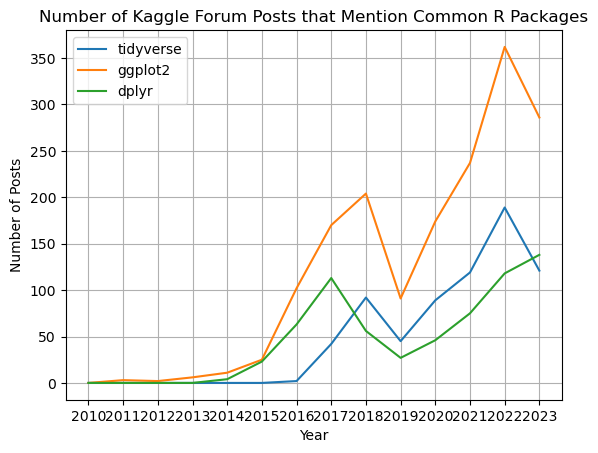

In [4]:
''' count frequencies of R libraries mentioned in forum posts by year '''
rl = ['tidyverse', 'ggplot', 'dplyr'] # words to count

# tokenize the comment posts and count the frequency of selected words (by year)
ForumRLCount = {2010: {}, 2011: {}, 2012: {}, 2013: {}, 2014: {}, 2015: {}, 2016: {}, 2017: {}, 
                2018: {}, 2019: {}, 2020: {}, 2021: {}, 2022: {}, 2023: {}}
for year in np.sort(ForumMessages['Year'].unique()):
    ForumMessagesYear = ForumMessages[ForumMessages['Year']==year]
    for word in rl:
        post_counts = (ForumMessagesYear['Message'].str.contains(word, case=False)).sum()
        ForumRLCount[year][word] = post_counts

ForumRLCountDF = pd.DataFrame({'Year': list(ForumRLCount.keys())})

n_tidyverse, n_ggplot2, n_dplyr = [], [], []
for year in ForumRLCount.keys():
    try: n_tidyverse.append(ForumRLCount[year]['tidyverse'])
    except: n_tidyverse.append(0)
    try: n_ggplot2.append(ForumRLCount[year]['ggplot'])
    except: n_ggplot2.append(0)
    try: n_dplyr.append(ForumRLCount[year]['dplyr'])
    except: n_ggplot2.append(0)
    
ForumRLCountDF['tidyverse'] = n_tidyverse
ForumRLCountDF['ggplot'] = n_ggplot2
ForumRLCountDF['dplyr'] = n_dplyr

plt.figure()
plt.plot(ForumRLCountDF['Year'], ForumRLCountDF['tidyverse'], label = 'tidyverse')
plt.plot(ForumRLCountDF['Year'], ForumRLCountDF['ggplot'], label = 'ggplot2')
plt.plot(ForumRLCountDF['Year'], ForumRLCountDF['dplyr'], label = 'dplyr')
plt.xticks(ForumRLCountDF['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.title('Number of Kaggle Forum Posts that Mention Common R Packages')
plt.legend()


### Analysis of Competitions and Submissions

Text(0, 0.5, 'Number of Submissions (in Millions)')

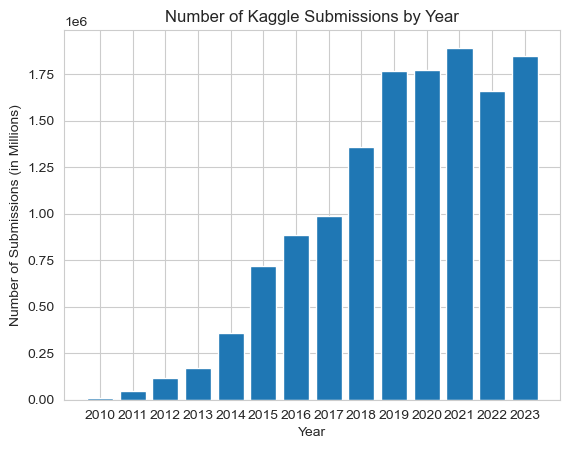

In [33]:
''' how do the number of submissions change over the years? '''
Submissions = pd.read_csv('meta_kaggle_data/Submissions.csv')
Submissions = Submissions[['Id', 'TeamId', 'SubmissionDate']]
Submissions['SubmissionDate'] = pd.to_datetime(Submissions['SubmissionDate'])
Submissions['SubmissionDate'] = Submissions['SubmissionDate'].dt.year
Submissions = Submissions.rename(columns={'SubmissionDate': 'Year'})
SubmissionsYearly = Submissions.groupby('Year', as_index=False).count()
SubmissionsYearly = SubmissionsYearly[['Year', 'Id']]
SubmissionsYearly = SubmissionsYearly[SubmissionsYearly['Year'] <= 2023]
SubmissionsYearly = SubmissionsYearly.rename(columns={'Id': 'Number of Submissions'})

plt.figure()
plt.bar(SubmissionsYearly['Year'], SubmissionsYearly['Number of Submissions'])
plt.xticks(SubmissionsYearly['Year'])
plt.title('Number of Kaggle Submissions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Submissions (in Millions)')

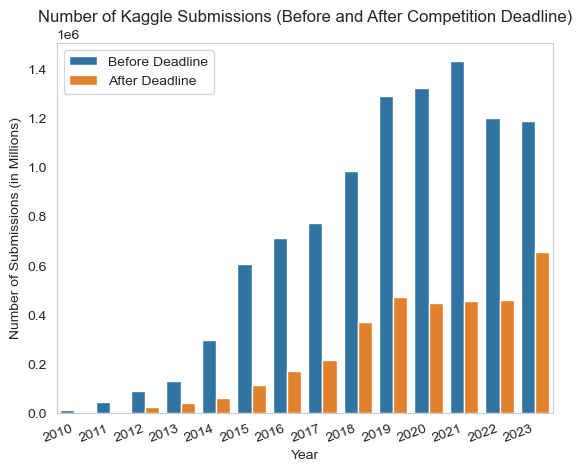

In [34]:
''' make clustered bar chart of yearly submissions (before and after deadline) '''
Submissions = pd.read_csv('meta_kaggle_data/Submissions.csv')
Submissions = Submissions[['Id', 'SubmissionDate', 'IsAfterDeadline']]
Submissions['SubmissionDate'] = pd.to_datetime(Submissions['SubmissionDate'])
Submissions['SubmissionDate'] = Submissions['SubmissionDate'].dt.year
Submissions = Submissions.rename(columns={'SubmissionDate': 'Year'})
Submissions = Submissions[Submissions['Year'] <= 2023]
SubmissionsBeforeAfter = Submissions.groupby(['Year', 'IsAfterDeadline']).size().unstack().reset_index()
SubmissionsBeforeAfter = SubmissionsBeforeAfter.rename(columns={False:'Before Deadline', True:'After Deadline'})

plt.figure()
sns.barplot(data=SubmissionsBeforeAfter.melt(id_vars='Year', value_vars=['Before Deadline', 'After Deadline'], 
                                             var_name='Deadline', value_name='Number of Submissions'), 
            y="Number of Submissions", x="Year", hue="Deadline")
plt.xticks(rotation=20, ha='right')
plt.xlabel('Year')
plt.ylabel('Number of Submissions (in Millions)')
plt.grid(axis='y')
plt.title('Number of Kaggle Submissions (Before and After Competition Deadline)')
plt.legend(loc='upper left')

In [7]:
# correlation between pre-deadline and post-deadline submission quantities
PrePostSubCorr = SubmissionsBeforeAfter['Before Deadline'].corr(SubmissionsBeforeAfter['After Deadline'])

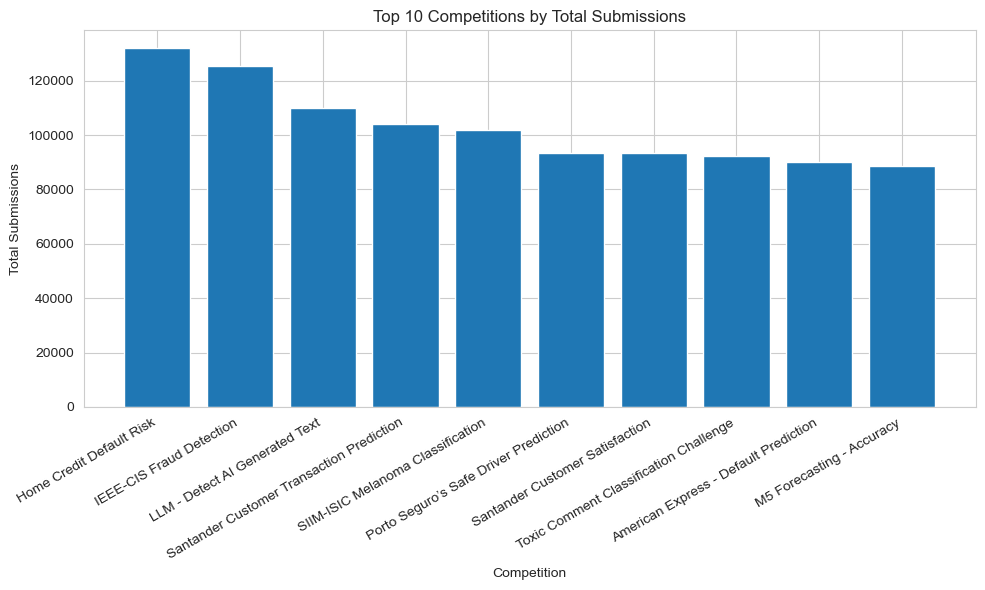

In [35]:
''' Top 10 competitions by total submissions '''
Competitions = pd.read_csv('meta_kaggle_data/Competitions.csv')
plt.figure(figsize=(10, 6))
plt.bar(Competitions.sort_values(by="TotalSubmissions", ascending=False).head(10)["Title"], 
        Competitions.sort_values(by="TotalSubmissions", ascending=False).head(10)["TotalSubmissions"])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 10 Competitions by Total Submissions')
plt.xlabel('Competition')
plt.ylabel('Total Submissions')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

Text(0, 0.5, 'Number of Competitions Created')

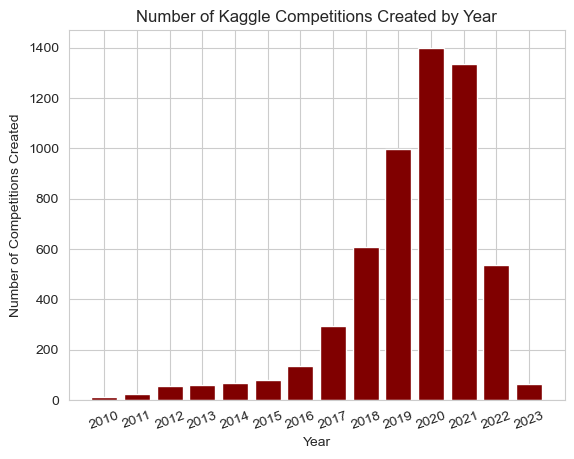

In [36]:
''' how do the number of competitions created change over the years? '''
Competitions = pd.read_csv('meta_kaggle_data/Competitions.csv')
Competitions = Competitions[['Id', 'EnabledDate']]
Competitions['EnabledDate'] = pd.to_datetime(Competitions['EnabledDate'])
Competitions['EnabledDate'] = Competitions['EnabledDate'].dt.year
Competitions = Competitions.rename(columns={'EnabledDate': 'Year Created'})
CompetitionsYearly = Competitions.groupby('Year Created', as_index=False).count()
CompetitionsYearly = CompetitionsYearly[(CompetitionsYearly['Year Created'] <= 2023) & 
                                        (CompetitionsYearly['Year Created'] >= 2010)]
CompetitionsYearly = CompetitionsYearly.rename(columns={'Id': 'Number of Competitions'})

plt.figure()
plt.bar(CompetitionsYearly['Year Created'], CompetitionsYearly['Number of Competitions'], color='maroon')
plt.xticks(CompetitionsYearly['Year Created'], rotation=20)
plt.title('Number of Kaggle Competitions Created by Year')
plt.xlabel('Year')
plt.ylabel('Number of Competitions Created')

Text(0.5, 1.0, 'Top 10 Competitions by Total Submissions Including Post-Deadline Submissions')

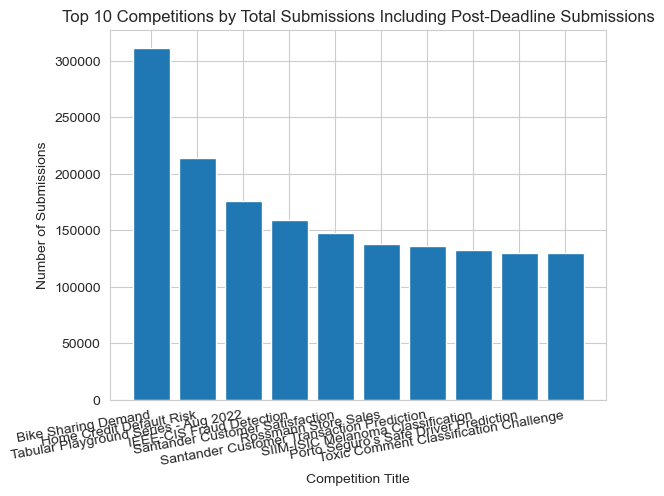

In [37]:
''' top 10 or 15 competitions based on total submissions and number of pre & post-deadline submissions '''
Submissions = pd.read_csv('meta_kaggle_data/Submissions.csv')
Submissions = Submissions[['Id', 'TeamId', 'SubmissionDate', 'IsAfterDeadline']]
Submissions = Submissions.rename(columns={'Id': 'SubmissionId'})
Teams = pd.read_csv('meta_kaggle_data/Teams.csv')
Teams = Teams[['Id', 'CompetitionId']]
Teams = Teams.rename(columns={'Id': 'TeamId'})
Competitions = pd.read_csv('meta_kaggle_data/Competitions.csv')
Competitions = Competitions[['Id', 'Title']]
Competitions = Competitions.rename(columns={'Id': 'CompetitionId'})

SubmissionDeadline = Submissions[['TeamId', 'IsAfterDeadline']]
SubmittedWhen = SubmissionDeadline.groupby(['TeamId', 'IsAfterDeadline']).size().unstack(fill_value=0).reset_index()
SubmittedWhen = SubmittedWhen.rename(columns={False: 'Before Deadline', True: 'After Deadline'})

SubmissionsTeams = pd.merge(SubmittedWhen, Teams, 
                            left_on='TeamId', right_on='TeamId', how='inner')
BeforeAfterDeadlineCount = SubmissionsTeams.groupby(['CompetitionId'], as_index=False).sum()
BeforeAfterDeadlineCount = BeforeAfterDeadlineCount[['CompetitionId', 'Before Deadline', 'After Deadline']]
BeforeAfterDeadlineCount['Total Submissions'] = BeforeAfterDeadlineCount['Before Deadline'] + \
    BeforeAfterDeadlineCount['After Deadline']
BeforeAfterDeadlineCount = BeforeAfterDeadlineCount[['CompetitionId', 'Before Deadline', 'After Deadline', 
                                                     'Total Submissions']]

SubmissionsCompetitions = pd.merge(BeforeAfterDeadlineCount, Competitions, 
                                   left_on='CompetitionId', right_on='CompetitionId', how='left')

TopTenCompetitions = SubmissionsCompetitions.sort_values(by='Total Submissions', ascending=False)[:10]

plt.figure()
plt.bar(TopTenCompetitions['Title'], TopTenCompetitions['Total Submissions'])
plt.xticks(rotation=10, ha='right')
plt.xlabel('Competition Title')
plt.ylabel('Number of Submissions')
plt.title('Top 10 Competitions by Total Submissions Including Post-Deadline Submissions')

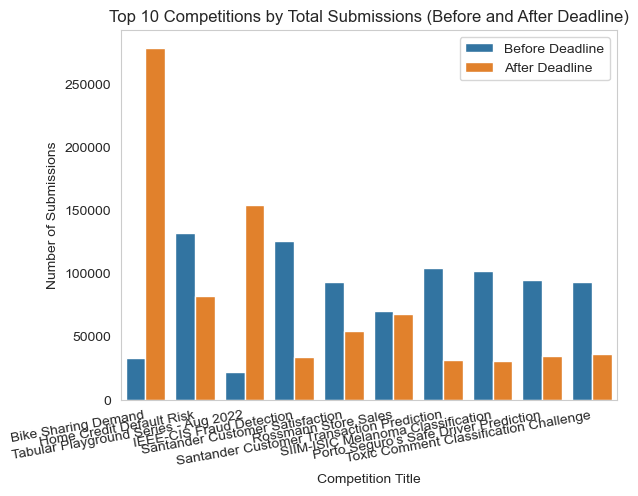

In [32]:
plt.figure()
sns.barplot(data=TopTenCompetitions.melt(id_vars='Title', value_vars=['Before Deadline', 'After Deadline'], 
                                         var_name='Deadline', value_name='Number of Submissions'), 
            y="Number of Submissions", x="Title", hue="Deadline")
plt.xticks(rotation=10, ha='right')
plt.xlabel('Competition Title')
plt.ylabel('Number of Submissions')
plt.grid(axis='y')
plt.title('Top 10 Competitions by Total Submissions (Before and After Deadline)')
plt.legend()
sns.set_style("whitegrid")

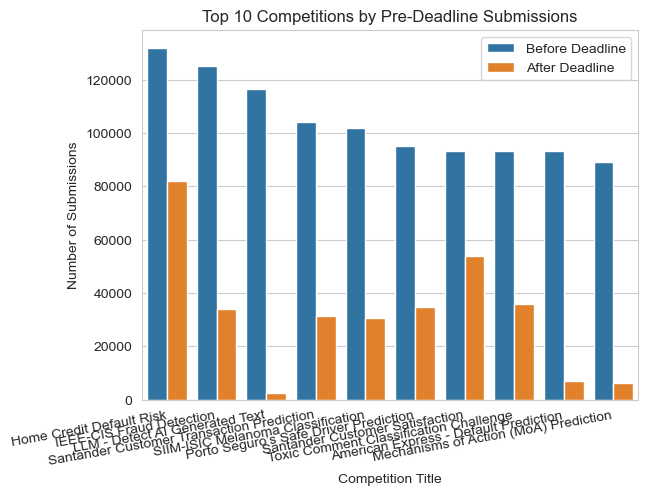

In [12]:
Top10PreDeadlineSubmissions = SubmissionsCompetitions.sort_values(by='Before Deadline', ascending=False)[:10]
plt.figure()
# plt.bar(Top10PreDeadlineSubmissions['Title'], Top10PreDeadlineSubmissions['After Deadline'], color='green')
sns.barplot(data=Top10PreDeadlineSubmissions.melt(id_vars='Title', 
                                                  value_vars=['Before Deadline', 'After Deadline'], 
                                                  var_name='Deadline', value_name='Number of Submissions'), 
            y="Number of Submissions", x="Title", hue="Deadline")
plt.xticks(rotation=10, ha='right')
plt.xlabel('Competition Title')
plt.ylabel('Number of Submissions')
plt.grid(axis='y')
plt.title('Top 10 Competitions by Pre-Deadline Submissions')
plt.legend()
plt.grid(axis='y')

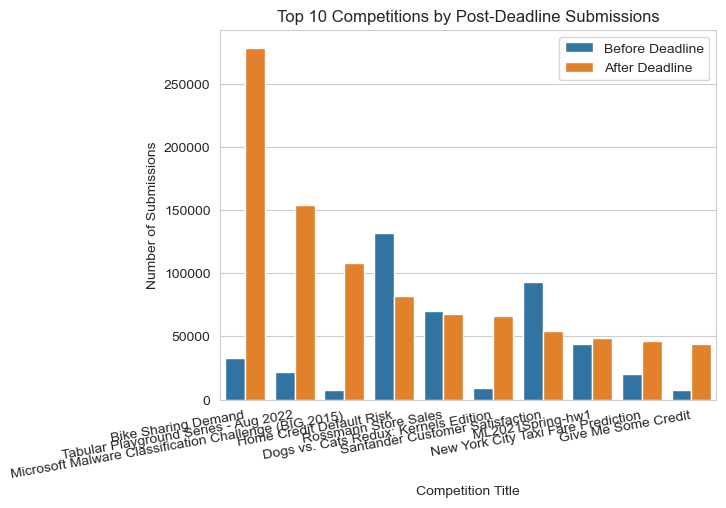

In [13]:
Top10PostDeadlineSubmissions = SubmissionsCompetitions.sort_values(by='After Deadline', ascending=False)[:10]
plt.figure()
# plt.bar(Top10PostDeadlineSubmissions['Title'], Top10PostDeadlineSubmissions['After Deadline'], color='green')
sns.barplot(data=Top10PostDeadlineSubmissions.melt(id_vars='Title', 
                                                    value_vars=['Before Deadline', 'After Deadline'], 
                                                    var_name='Deadline', value_name='Number of Submissions'), 
            y="Number of Submissions", x="Title", hue="Deadline")
plt.xticks(rotation=10, ha='right')
plt.xlabel('Competition Title')
plt.ylabel('Number of Submissions')
plt.grid(axis='y')
plt.title('Top 10 Competitions by Post-Deadline Submissions')
plt.legend()
plt.grid(axis='y')

Text(0.5, 1.0, 'Number of Yearly Submission for Top 7 Competitions by Total Post-Deadline Submissions')

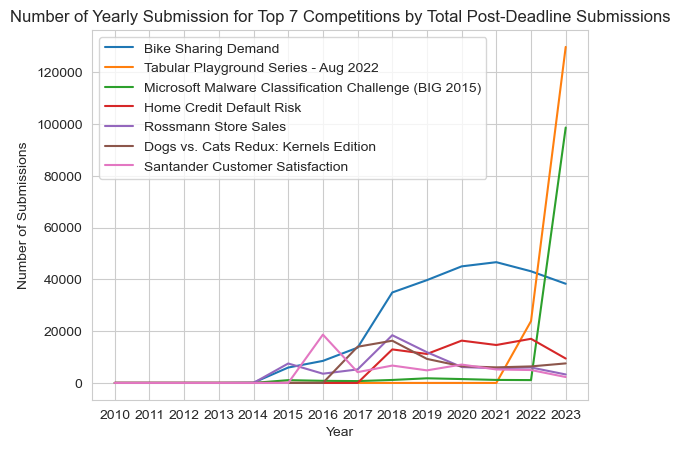

In [14]:
''' temporal analysis of competitions ranked by post-deadline submissions '''
Submissions = pd.read_csv('meta_kaggle_data/Submissions.csv')
Submissions = Submissions[['Id', 'TeamId', 'SubmissionDate', 'IsAfterDeadline']]
SubmissionsPostDeadline = Submissions[Submissions['IsAfterDeadline'] == True]
SubmissionsPostDeadline = SubmissionsPostDeadline[['Id', 'TeamId', 'SubmissionDate']]
SubmissionsPostDeadline['SubmissionDate'] = pd.to_datetime(SubmissionsPostDeadline['SubmissionDate'])
SubmissionsPostDeadline['SubmissionDate'] = SubmissionsPostDeadline['SubmissionDate'].dt.year
SubmissionsPostDeadline = SubmissionsPostDeadline.rename(columns={'Id': 'SubmissionId', 'SubmissionDate': 'Year'})
SubmissionsPostDeadline = SubmissionsPostDeadline[SubmissionsPostDeadline['Year'] <= 2023]
Teams = pd.read_csv('meta_kaggle_data/Teams.csv')
Teams = Teams[['Id', 'CompetitionId']]
Teams = Teams.rename(columns={'Id': 'TeamId'})
Competitions = pd.read_csv('meta_kaggle_data/Competitions.csv')
Competitions = Competitions[['Id', 'Title']]
Competitions = Competitions.rename(columns={'Id': 'CompetitionId'})

SubmissionsTeamsPostDeadline = pd.merge(SubmissionsPostDeadline, Teams, 
                                        left_on='TeamId', right_on='TeamId', how='inner')
SubmissionsTeamsGroup = \
    SubmissionsTeamsPostDeadline.groupby(['CompetitionId', 'Year']).size().unstack(fill_value=0).reset_index()

SubmissionsCompetitionsPostDeadline = pd.merge(SubmissionsTeamsGroup, Competitions, 
                                               left_on='CompetitionId', right_on='CompetitionId', how='inner')

SubmissionsCompetitionsPostDeadline['Total Submissions'] = \
    SubmissionsCompetitionsPostDeadline[2010] + SubmissionsCompetitionsPostDeadline[2011] + \
    SubmissionsCompetitionsPostDeadline[2012] + SubmissionsCompetitionsPostDeadline[2013] + \
    SubmissionsCompetitionsPostDeadline[2014] + SubmissionsCompetitionsPostDeadline[2015] + \
    SubmissionsCompetitionsPostDeadline[2016] + SubmissionsCompetitionsPostDeadline[2017] + \
    SubmissionsCompetitionsPostDeadline[2018] + SubmissionsCompetitionsPostDeadline[2019] + \
    SubmissionsCompetitionsPostDeadline[2020] + SubmissionsCompetitionsPostDeadline[2021] + \
    SubmissionsCompetitionsPostDeadline[2022] + SubmissionsCompetitionsPostDeadline[2023]

Top15PostDeadlineYearly = SubmissionsCompetitionsPostDeadline.sort_values(by='Total Submissions', 
                                                                           ascending=False)[:15]

Top15PostDeadlineYearlyT = Top15PostDeadlineYearly[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 
                                                    2017, 2018, 2019, 2020, 2021, 2022, 2023]].T

# Rename columns using the generated new names
Top15PostDeadlineYearlyT.columns = list(Top15PostDeadlineYearly['Title'])

plt.figure()
for title in list(Top15PostDeadlineYearly['Title'])[:7]:
    plt.plot(list(Top15PostDeadlineYearlyT.index), Top15PostDeadlineYearlyT[title], label=title)
plt.legend()
plt.xticks(list(Top15PostDeadlineYearlyT.index))
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.grid(True)
plt.title('Number of Yearly Submission for Top 7 Competitions by Total Post-Deadline Submissions')

### Analysis of Tags and Subtags

In [15]:
''' Dataframes for tags and subtags '''
Tags = pd.read_csv('meta_kaggle_data/Tags.csv')
SubTagsCount = Tags.groupby('ParentTagId', as_index=False).count()[['ParentTagId', 'Id']]
SubTagsCount = SubTagsCount.rename(columns={'ParentTagId': 'Id', 'Id': 'Subtags'})
SubTagsCount = SubTagsCount.sort_values(by='Subtags', ascending=False)
SubTagsCount = pd.merge(left=SubTagsCount, right=Tags[['Id', 'Name']], 
                        left_on='Id', right_on='Id', how='inner')

for Id in SubTagsCount['Id']:
    if Id == SubTagsCount['Id'][0]:
        TagsSubtags = Tags[Tags['ParentTagId']==Id][['ParentTagId', 'Id', 'Name', 'DatasetCount', 
                                                     'CompetitionCount', 'KernelCount']]
    else:
        TagsSubtagsTemp = Tags[Tags['ParentTagId']==Id][['ParentTagId', 'Id', 'Name', 'DatasetCount', 
                                                     'CompetitionCount', 'KernelCount']]
        TagsSubtags = pd.concat([TagsSubtags, TagsSubtagsTemp], axis=0)

TagsSubtags = TagsSubtags.rename(columns={'Id': 'SubtagId', 'Name': 'Subtag Name'})
TagsSubtags['ParentTagName'] = [SubTagsCount.loc[SubTagsCount['Id']==Id, 'Name'].values[0] for Id in TagsSubtags.ParentTagId]
TagsSubtags = TagsSubtags[['ParentTagId', 'ParentTagName', 'SubtagId', 'Subtag Name', 
                           'DatasetCount', 'CompetitionCount', 'KernelCount']]

Text(0.5, 1.0, 'Top 10 Tags by Dataset Counts')

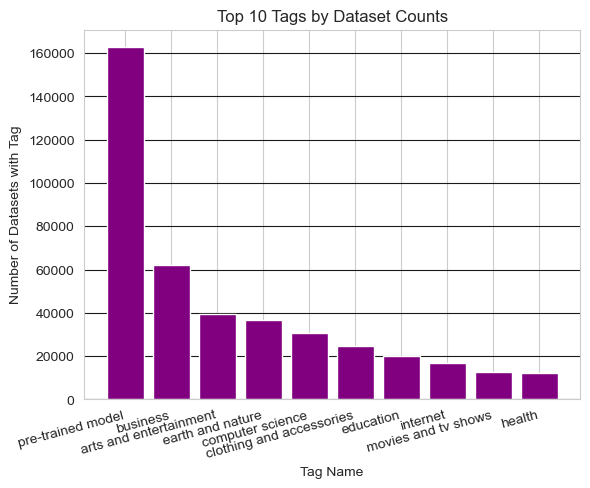

In [16]:
''' Top 10 tags by datasets '''
Top10TagsDatasets = TagsSubtags.sort_values(by='DatasetCount', ascending=False)[:10]

plt.figure()
plt.bar(Top10TagsDatasets['Subtag Name'], Top10TagsDatasets['DatasetCount'], color='purple')
plt.xticks(rotation=15, ha='right')
plt.xlabel('Tag Name')
plt.ylabel('Number of Datasets with Tag')
plt.grid(axis='y', color='0.1')
plt.title('Top 10 Tags by Dataset Counts')

Text(0.5, 1.0, 'Top 10 Tags by Competition Counts')

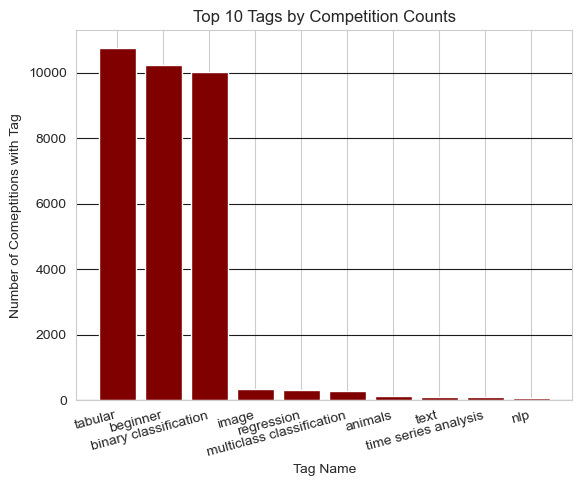

In [38]:
''' Top 10 tags by competitions '''
Top10TagsCompetitions = TagsSubtags.sort_values(by='CompetitionCount', ascending=False)[:10]

plt.figure()
plt.bar(Top10TagsCompetitions['Subtag Name'], Top10TagsCompetitions['CompetitionCount'], color='maroon')
plt.xticks(rotation=15, ha='right')
plt.xlabel('Tag Name')
plt.ylabel('Number of Comeptitions with Tag')
plt.grid(axis='y', color='0.1')
plt.title('Top 10 Tags by Competition Counts')

Text(0.5, 1.0, '#3-#13 Tags by Competition Counts')

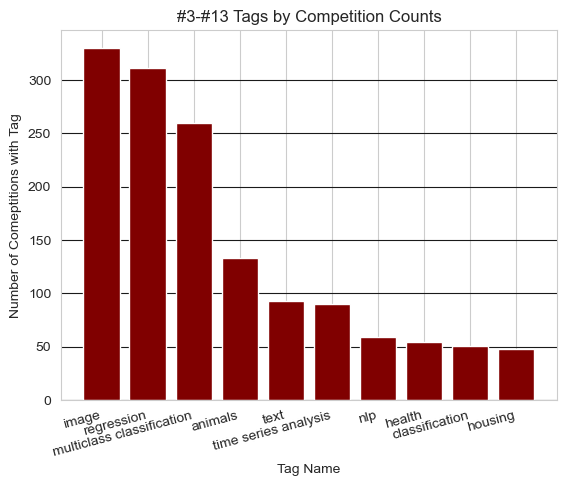

In [18]:
''' Top 10 tags competitions (after the top 3) '''
Top10TagsCompetitionsII = TagsSubtags.sort_values(by='CompetitionCount', ascending=False)[3:13]

plt.figure()
plt.bar(Top10TagsCompetitionsII['Subtag Name'], Top10TagsCompetitionsII['CompetitionCount'], color='maroon')
plt.xticks(rotation=15, ha='right')

plt.xlabel('Tag Name')
plt.ylabel('Number of Comeptitions with Tag')
plt.grid(axis='y', color='0.1')
plt.title('#3-#13 Tags by Competition Counts')

Text(0.5, 1.0, 'Top 10 Tags by Kernels Counts')

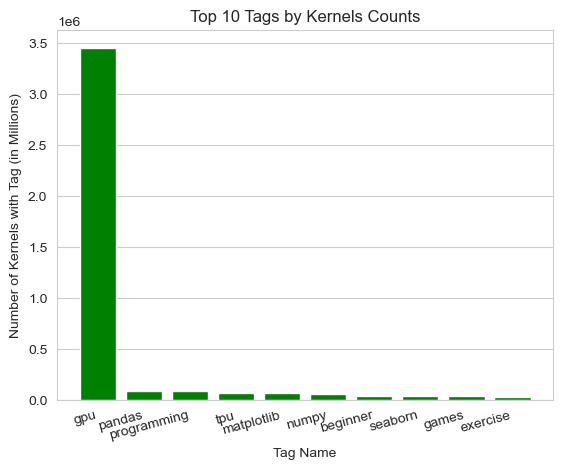

In [19]:
''' Top 10 tags by kernels '''
Top10TagsKernels = TagsSubtags.sort_values(by='KernelCount', ascending=False)[:10]

plt.figure()
plt.bar(Top10TagsKernels['Subtag Name'], Top10TagsKernels['KernelCount'], color='green')
plt.xticks(rotation=15, ha='right')
plt.xlabel('Tag Name')
plt.ylabel('Number of Kernels with Tag (in Millions)')
plt.grid(axis='x')
plt.title('Top 10 Tags by Kernels Counts')

Text(0.5, 1.0, 'Top 10 Tags by Kernels Counts')

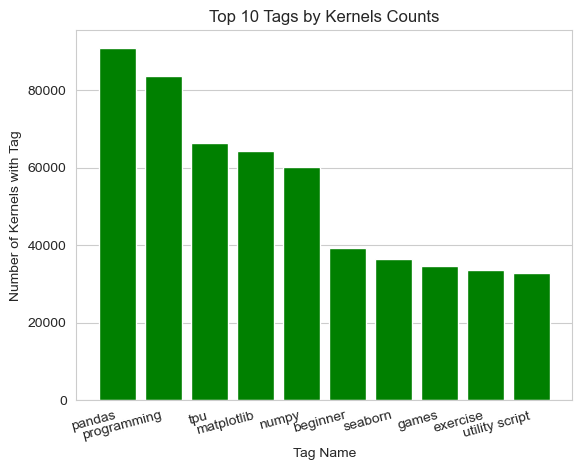

In [20]:
''' Top 10 tags kernels (after the top 1) '''
Top10TagsKernelsII = TagsSubtags.sort_values(by='KernelCount', ascending=False)[1:11]

plt.figure()
plt.bar(Top10TagsKernelsII['Subtag Name'], Top10TagsKernelsII['KernelCount'], color='green')
plt.xticks(rotation=15, ha='right')
plt.xlabel('Tag Name')
plt.ylabel('Number of Kernels with Tag')
plt.grid(axis='x')
plt.title('Top 10 Tags by Kernels Counts')

In [21]:
''' Get packages subset of TagsSubtags and order by KernelCount '''
PackagesTags = TagsSubtags[TagsSubtags['ParentTagName']=='packages']
PackagesTags = PackagesTags.sort_values(by='KernelCount', ascending=False)
PackagesTags['ParentTagId'] = PackagesTags['ParentTagId'].astype(int).astype(str)
PackagesTags['SubtagId'] = PackagesTags['SubtagId'].astype(int).astype(str)
display(PackagesTags)

,ParentTagId,ParentTagName,SubtagId,Subtag Name,DatasetCount,CompetitionCount,KernelCount
280,16585,packages,16611,pandas,1082,0,90939
276,16585,packages,16607,matplotlib,309,2,64206
278,16585,packages,16609,numpy,341,1,60198
292,16585,packages,16623,seaborn,169,1,36385
296,16585,packages,16627,tensorflow,512,1,15148
293,16585,packages,16624,sklearn,270,0,14305
271,16585,packages,16602,keras,263,0,7760
283,16585,packages,16614,plotly,98,0,7745
163,16585,packages,13403,xgboost,103,0,6800
257,16585,packages,16588,cv2,173,0,6043


In [22]:
''' Get techniques subset of TagsSubtags and order by KernelCount '''
TechniquesTags = TagsSubtags[TagsSubtags['ParentTagName']=='technique']
TechniquesTags = TechniquesTags.sort_values(by='KernelCount', ascending=False)
TechniquesTags['ParentTagId'] = TechniquesTags['ParentTagId'].astype(int).astype(str)
TechniquesTags['SubtagId'] = TechniquesTags['SubtagId'].astype(int).astype(str)
display(TechniquesTags)

,ParentTagId,ParentTagName,SubtagId,Subtag Name,DatasetCount,CompetitionCount,KernelCount
146,13200,technique,13208,data visualization,5176,5,32611
139,13200,technique,13201,exploratory data analysis,3658,3,29337
157,13200,technique,13310,deep learning,3009,18,15777
140,13200,technique,13202,data cleaning,2697,13,12123
150,13200,technique,13215,data analytics,5270,10,11306
154,13200,technique,13306,feature engineering,552,3,7982
142,13200,technique,13204,nlp,3614,59,7600
162,13200,technique,13402,random forest,237,0,6459
167,13200,technique,13407,neural networks,558,1,5098
145,13200,technique,13207,computer vision,3313,33,4464


In [23]:
''' Get temporal (yearly) kernel counts of select techniques '''
techniques = ['feature engineering', 'nlp', 'random forest', 'neural networks', 'computer vision', 'decision tree', 
              'time series analysis', 'ensembling', 'svm', 'automl', 'gradient boosting', 'transfer learning']

KernelTags = pd.read_csv('meta_kaggle_data/KernelTags.csv')
Kernels = pd.read_csv('meta_kaggle_data/Kernels.csv')
Kernels = Kernels.dropna(subset=['CreationDate'])

def kernel_counter(items_list, df):
    kernel_counts = {}
    for item in items_list:
        item_tag_id = int(df[df['Subtag Name']==item]['SubtagId'].iloc[0])
        kernel_tags_subset = KernelTags[KernelTags['TagId']==item_tag_id]['KernelId']
        kernels_subset = Kernels[Kernels['Id'].isin(kernel_tags_subset)].copy()
        kernels_subset['CreationDate'] = pd.to_datetime(kernels_subset['CreationDate'], format='%m/%d/%Y %H:%M:%S').copy()
        kernels_subset['Year'] = kernels_subset['CreationDate'].dt.year.copy()
        kernels_subset = kernels_subset[kernels_subset['Year'] < 2024]
        year_counts = {}
        for year in kernels_subset['Year'].unique():
            count = len(kernels_subset[kernels_subset['Year']==year])
            year_counts[year] = count
        kernel_counts[item] = year_counts
    return kernel_counts

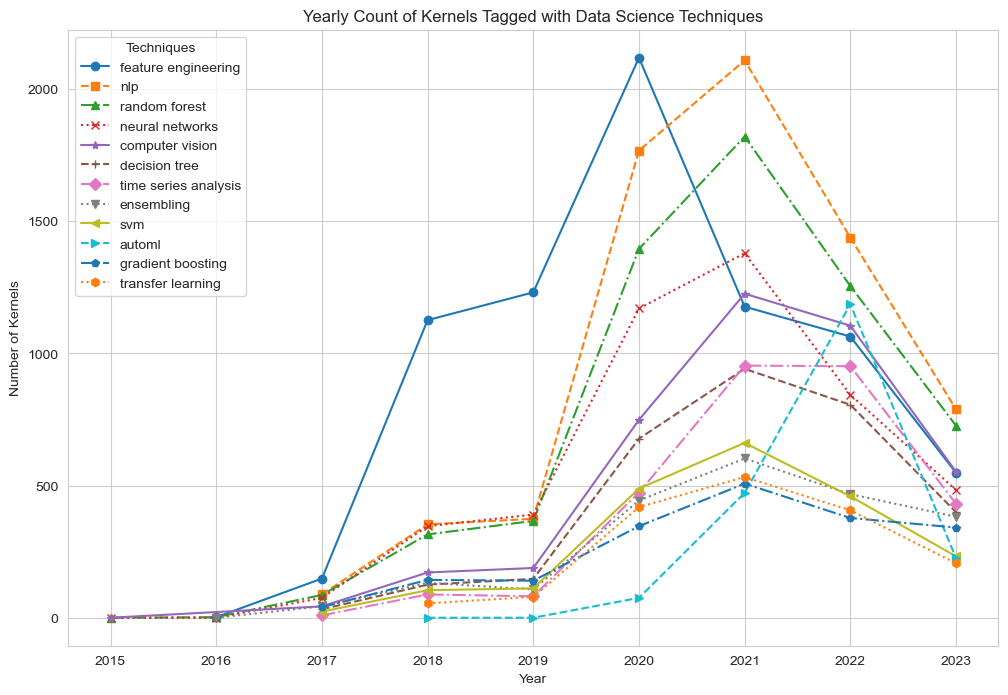

In [24]:
techniques_kernel_counts = kernel_counter(techniques, TechniquesTags)

years = []
values = []

# loop through each technique and extract data for the line chart
for technique, yearly_counts in techniques_kernel_counts.items():
    years.extend(list(yearly_counts.keys()))
    values.extend(list(yearly_counts.values()))

fig, ax = plt.subplots(figsize=(12,8))
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x', '*', '+', 'D', 'v', '<', '>', 'p', 'h']

for i, (technique, yearly_counts) in enumerate(techniques_kernel_counts.items()):
    line_style = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    ax.plot(list(yearly_counts.keys()), list(yearly_counts.values()), label=technique, linestyle=line_style, 
            marker=marker, linewidth=1.5)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Kernels')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title('Yearly Count of Kernels Tagged with Data Science Techniques')
ax.legend(title='Techniques', loc='upper left')
ax.grid(True)

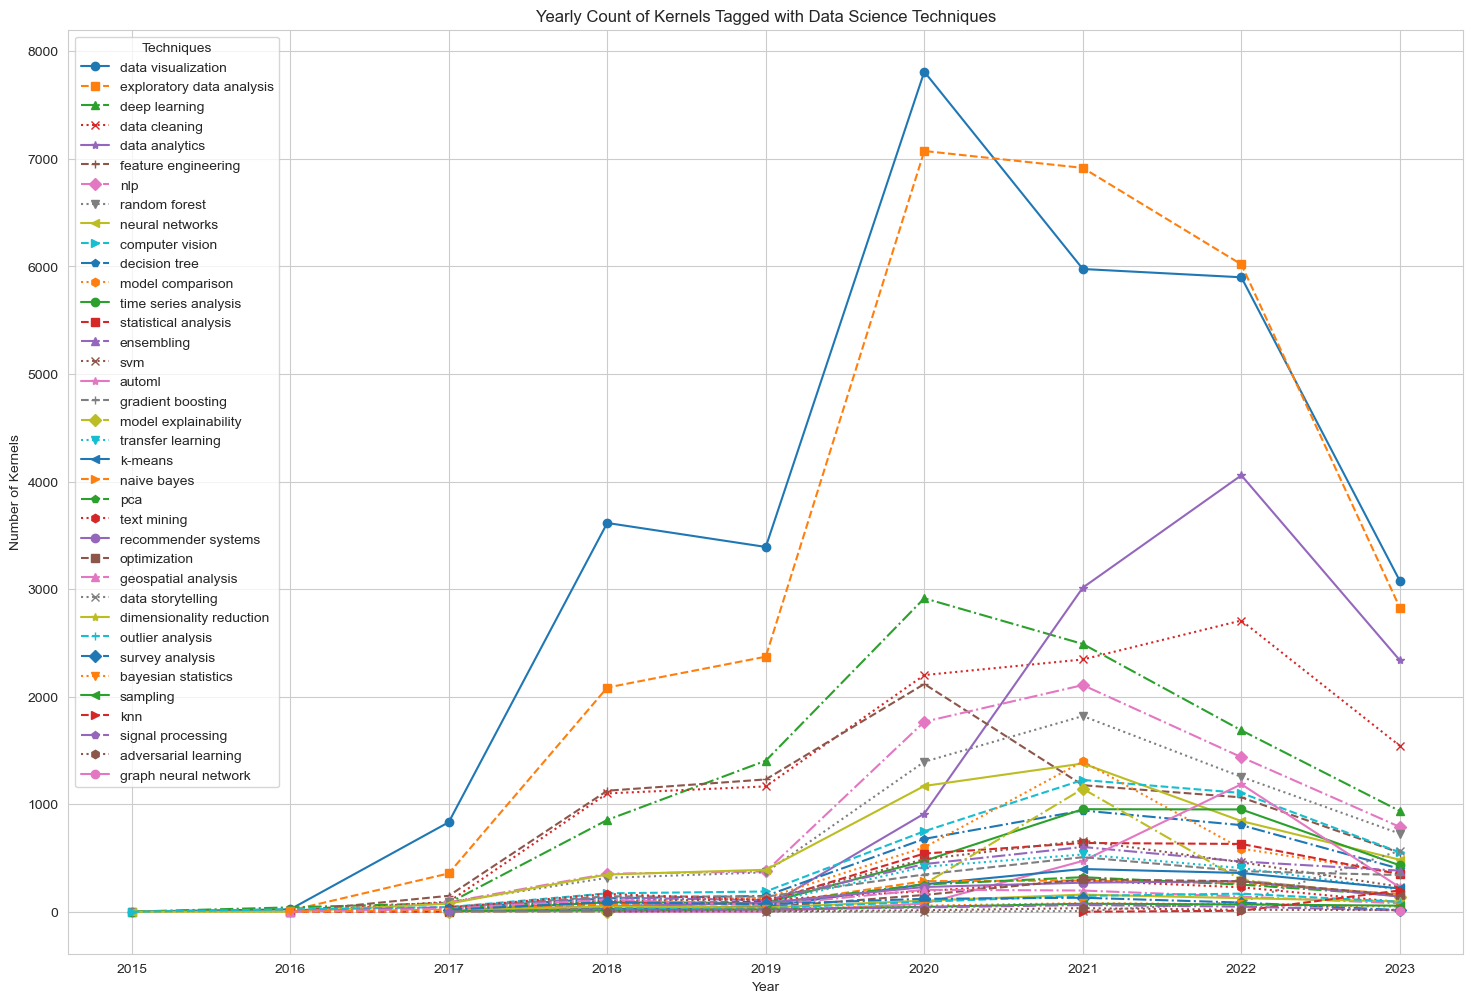

In [25]:
''' plot ALL techniques to see if any are trending upwards in 2023 '''
techniques_all = list(TechniquesTags['Subtag Name'])
techniques_all_kernel_counts= kernel_counter(techniques_all, TechniquesTags)

years = []
values = []

for technique, yearly_counts in techniques_all_kernel_counts.items():
    years.extend(list(yearly_counts.keys()))
    values.extend(list(yearly_counts.values()))

fig, ax = plt.subplots(figsize=(18, 12))
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x', '*', '+', 'D', 'v', '<', '>', 'p', 'h']

for i, (technique, yearly_counts) in enumerate(techniques_all_kernel_counts.items()):
    line_style = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    ax.plot(list(yearly_counts.keys()), list(yearly_counts.values()), label=technique, linestyle=line_style, 
            marker=marker, linewidth=1.5)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Kernels')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title('Yearly Count of Kernels Tagged with Data Science Techniques')
ax.legend(title='Techniques', loc='upper left')
ax.grid(True)


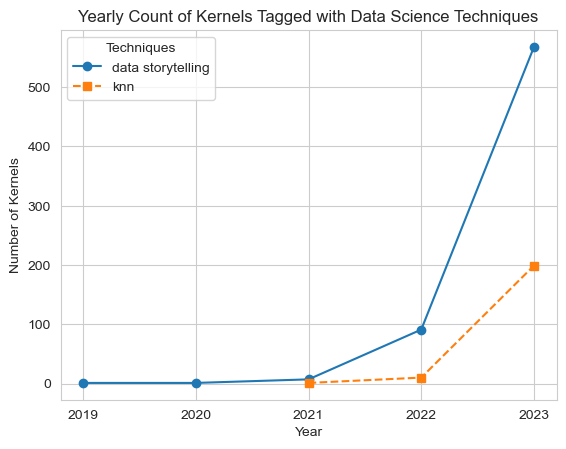

In [26]:
''' plot 'data storytelling' and 'knn' bc they trend upward at 2023 '''
techniques_upward = ['data storytelling', 'knn']
techniques_upward_kernel_counts= kernel_counter(techniques_upward, TechniquesTags)

years = []
values = []

for technique, yearly_counts in techniques_upward_kernel_counts.items():
    years.extend(list(yearly_counts.keys()))
    values.extend(list(yearly_counts.values()))

fig, ax = plt.subplots()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x', '*', '+', 'D', 'v', '<', '>', 'p', 'h']

for i, (technique, yearly_counts) in enumerate(techniques_upward_kernel_counts.items()):
    line_style = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    ax.plot(list(yearly_counts.keys()), list(yearly_counts.values()), label=technique, linestyle=line_style, marker=marker)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Kernels')
ax.set_title('Yearly Count of Kernels Tagged with Data Science Techniques')
ax.legend(title='Techniques', loc='upper left')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.grid(True)